# <font color='green'>Creating Models for Spoken Digit Recognition</font>

This ipynb file has the detailed code for the input data, preprocessing of it, featurizing, training the models (LSTM), computing F1 scores and losses for the models, saving the models (which we will use in our main app for predictions on test data) recording the metrics results.<br><br>
<b>NOTE :-</b> Here, we are going to create 4 deep learning models given below, based on tweaking the dataset and select the model which returns best metrics score.<br>
<ol>
<li>Raw Data</li>
<li>Spectrogram Data</li>
<li>Data augmentation with raw features</li>
<li>Data augmentation with Spectrogram Data</li>
</ol>

## <font color='green'>Imports, Dataset download and unzipping, reading sound files</font>

In [2]:
# import necessary libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import librosa
from zipfile import ZipFile
import os
from pathlib import Path
import sys
import matplotlib.pyplot as pyplot
import IPython

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model
import tensorflow as tf

from prettytable import PrettyTable

In [7]:
# downloading the data from Google Drive
# gets downloaded in the utility folder

!gdown --id 17YGQheavMbM6aeHYjUcGssXfb7eQHo1z 

C:\Users\rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\gdown\cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=17YGQheavMbM6aeHYjUcGssXfb7eQHo1z
To: e:\GITHUB REPOS\spoken-digit-recognition\src\utility\recordings.zip

  0%|          | 0.00/9.28M [00:00<?, ?B/s]
 17%|█▋        | 1.57M/9.28M [00:00<00:00, 10.6MB/s]
 34%|███▍      | 3.15M/9.28M [00:00<00:00, 7.62MB/s]
 45%|████▌     | 4.19M/9.28M [00:00<00:00, 6.98MB/s]
 56%|█████▋    | 5.24M/9.28M [00:00<00:00, 5.77MB/s]
 73%|███████▎  | 6.82M/9.28M [00:00<00:00, 6.85MB/s]
 85%|████████▍ | 7.86M/9.28M [00:01<00:00, 6.71MB/s]
 96%|█████████▌| 8.91M/9.28M [00:01<00:00, 6.44MB/s]
100%|██████████| 9.28M/9.28M [00:01<00:00, 6.78MB/s]


In [17]:
#unzipping
# reference - https://www.geeksforgeeks.org/unzipping-files-in-python/

with ZipFile("E:/GITHUB REPOS/spoken-digit-recognition/src/utility/recordings.zip", 'r') as zObject:
    zObject.extractall(
        path="E:/GITHUB REPOS/spoken-digit-recognition/src/utility/dataset")

In [3]:
# reading the sound files

recordings_ = Path('E:/GITHUB REPOS/spoken-digit-recognition/src/utility/dataset/recordings')
all_files = os.listdir(recordings_)

## <font color='green'>Exploring the sound dataset</font>

Let's visualize and play some of the audio files from the dataset.<br><br>
<b>Referrences</b> - <br>
1. https://colab.research.google.com/github/Tyler-Hilbert/AudioProcessingInPythonWorkshop/blob/master/AudioProcessingInPython.ipynb<br>
2. https://www.youtube.com/watch?v=37zCgCdV468

In [23]:
# cloning the repo which we are going to use for audio files exploration

!git clone https://github.com/AllenDowney/ThinkDSP.git 

Cloning into 'ThinkDSP'...
Updating files:  77% (238/306)
Updating files:  78% (239/306)
Updating files:  79% (242/306)
Updating files:  80% (245/306)
Updating files:  81% (248/306)
Updating files:  82% (251/306)
Updating files:  83% (254/306)
Updating files:  84% (258/306)
Updating files:  85% (261/306)
Updating files:  86% (264/306)
Updating files:  86% (265/306)
Updating files:  87% (267/306)
Updating files:  87% (269/306)
Updating files:  88% (270/306)
Updating files:  89% (273/306)
Updating files:  90% (276/306)
Updating files:  91% (279/306)
Updating files:  92% (282/306)
Updating files:  92% (284/306)
Updating files:  93% (285/306)
Updating files:  94% (288/306)
Updating files:  95% (291/306)
Updating files:  95% (292/306)
Updating files:  96% (294/306)
Updating files:  97% (297/306)
Updating files:  98% (300/306)
Updating files:  99% (303/306)
Updating files:  99% (304/306)
Updating files: 100% (306/306)
Updating files: 100% (306/306), done.


### Audio Sample 1

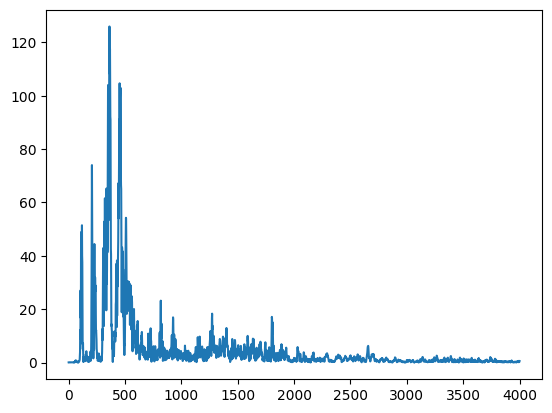

Writing sound.wav


In [24]:
sys.path.insert(0, 'ThinkDSP/code/') 
import thinkdsp

# Read in audio file
wave = thinkdsp.read_wave('E:/GITHUB REPOS/spoken-digit-recognition/src/utility/dataset/recordings/0_jackson_0.wav')

# Grab first 10 seconds of audio
clipLength = 10 # in seconds
index = 0
while (index < wave.ts.size and wave.ts[index] < clipLength):
	index += 1
# Remove extras
wave.ts = wave.ts[:index]
wave.ys = wave.ys[:index]

# Plot spectrum of audio file
spectrum = wave.make_spectrum()
spectrum.plot()
pyplot.show()

# Play audio file
wave.play()
IPython.display.Audio('sound.wav')

### Audio Sample 2

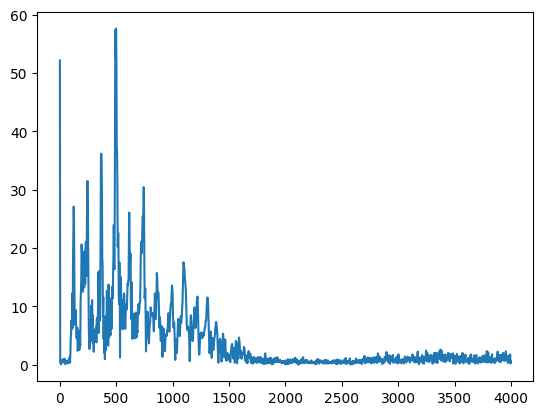

Writing sound.wav


In [25]:
# Read in audio file
wave = thinkdsp.read_wave('E:/GITHUB REPOS/spoken-digit-recognition/src/utility/dataset/recordings/1_nicolas_39.wav')

# Grab first 10 seconds of audio
clipLength = 10 # in seconds
index = 0
while (index < wave.ts.size and wave.ts[index] < clipLength):
	index += 1
# Remove extras
wave.ts = wave.ts[:index]
wave.ys = wave.ys[:index]

# Plot spectrum of audio file
spectrum = wave.make_spectrum()
spectrum.plot()
pyplot.show()

# Play audio file
wave.play()
IPython.display.Audio('sound.wav')

### Audio Sample 3

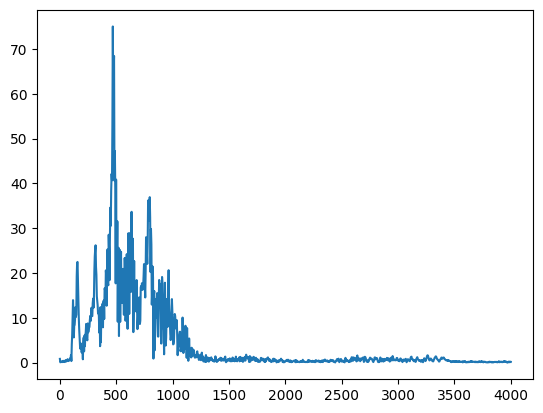

Writing sound.wav


In [26]:
# Read in audio file
wave = thinkdsp.read_wave('E:/GITHUB REPOS/spoken-digit-recognition/src/utility/dataset/recordings/4_yweweler_7.wav')

# Grab first 10 seconds of audio
clipLength = 10 # in seconds
index = 0
while (index < wave.ts.size and wave.ts[index] < clipLength):
	index += 1
# Remove extras
wave.ts = wave.ts[:index]
wave.ys = wave.ys[:index]

# Plot spectrum of audio file
spectrum = wave.make_spectrum()
spectrum.plot()
pyplot.show()

# Play audio file
wave.play()
IPython.display.Audio('sound.wav')

## <font color='green'>Creating a pandas Dataframe for the audio dataset, train-validation data split</font>

In [4]:
#Create a dataframe(name=df_audio) with two columns(path, label).   
#You can get the label from the first letter of name.  
#Eg: 0_jackson_0 --> 0  
#0_jackson_43 --> 0

# empty lists to store audio paths and their labels
path_list = []
label_list = []

for i in all_files:
  # appending path and label of sound files in the lists
  path_list.append(recordings_/i)
  label_list.append(int(i[0]))

# creating a pandas dataframe with path and label as columns and assigning lists values to the mentioned columns
df_audio = pd.DataFrame({
    'path'  : path_list,
    'label' : label_list
})

# first 5 rows of the dataframe
print(df_audio.head())

                                                path  label
0  E:\GITHUB REPOS\spoken-digit-recognition\src\u...      0
1  E:\GITHUB REPOS\spoken-digit-recognition\src\u...      0
2  E:\GITHUB REPOS\spoken-digit-recognition\src\u...      0
3  E:\GITHUB REPOS\spoken-digit-recognition\src\u...      0
4  E:\GITHUB REPOS\spoken-digit-recognition\src\u...      0


In [5]:
# shuffling for randomness of the rows in a dataset

df_audio = shuffle(df_audio, random_state=33) #don't change the random state

In [6]:
# to check the results of shuffling the dataframe

print(df_audio.head())

                                                   path  label
766   E:\GITHUB REPOS\spoken-digit-recognition\src\u...      3
182   E:\GITHUB REPOS\spoken-digit-recognition\src\u...      0
1763  E:\GITHUB REPOS\spoken-digit-recognition\src\u...      8
1814  E:\GITHUB REPOS\spoken-digit-recognition\src\u...      9
596   E:\GITHUB REPOS\spoken-digit-recognition\src\u...      2


In [6]:
# split the data into train and validation and save in X_train, X_test, y_train, y_test
# splitting the data into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(df_audio['path'], df_audio['label'], test_size=0.3, stratify=df_audio['label'], random_state=45)

## <font color='green'>Preprocessing and analyzing the dataset </font>

### <font color='orange'>Converting audio files into arrays of raw data and computing the duration of audio files </font>

In [7]:
# this function return the array values of audio with sampling rate of 22050 and Duration

def load_wav(x, get_duration=True):  
    #loading the wav file with sampling rate of 22050
    samples, sample_rate = librosa.load(x, sr=22050)

    if get_duration:
        duration = librosa.get_duration(y=samples, sr=sample_rate)
        return [samples, duration]
    
    else:
        return samples

In [38]:
# use load_wav function that was written above to get every wave from every audio file. 
# save it in X_train_processed and X_test_processed
# X_train_processed/X_test_processed should be dataframes with two columns(raw_data, duration) with same index of X_train/y_train

def preprocessing(data):
  # empty lists to store raw data and duration 
  raw_data = []
  duration = []

  # looping through the data(train/test)
  for i in data:
    # calling the load_wav() which will return raw data and duration of files
    load_wav_data = load_wav(i)
    # appending raw data and duration in separate lists
    raw_data.append(load_wav_data[0])
    duration.append(load_wav_data[1])
  
  # returning newly created pandas dataframe which has raw_data and duration columns
  return pd.DataFrame({
      'raw_data': raw_data,
      'duration': duration
  })

# calling the above defined function for train and test data
X_train_processed = preprocessing(X_train)
X_test_processed = preprocessing(X_test)

In [39]:
# printing raw data arrays of audio files along with their duration

print(X_train_processed.head())

                                            raw_data  duration
0  [0.00011455886, 0.0001350142, 0.00011951462, 0...  0.276780
1  [0.015030296, 0.019285845, 0.017338067, 0.0149...  0.331519
2  [0.0002622896, 0.00049065956, 0.00033653423, -...  0.292789
3  [-0.008836386, -0.0106078815, -0.008852169, -0...  0.344127
4  [-0.00942073, -0.012156246, -0.0115117505, -0....  0.659637


### <font color='orange'>Analyzing the duration of audio files using histograms and percentiles (later used for padding sequences) </font>

<b>Histograms</b>

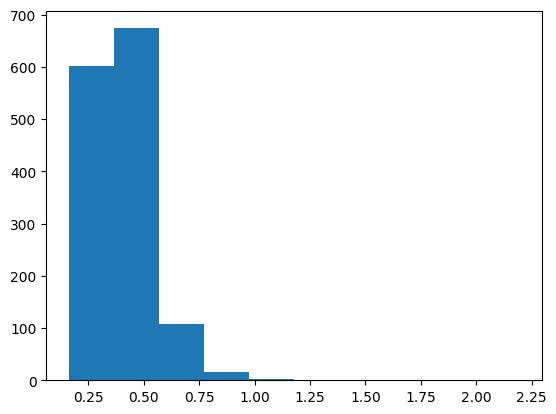

In [40]:
#plot the histogram of the duration for train

pyplot.hist(X_train_processed['duration'])
pyplot.show()

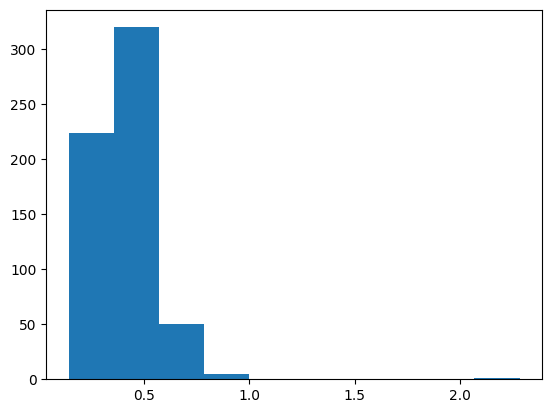

In [42]:
#plot the histogram of the duration for test

pyplot.hist(X_test_processed['duration'])
pyplot.show()

<b>Percentiles</b>

0 to 100 percentile values with step size of 10

In [45]:
######## TRAIN DATA ##################

# print 0 to 100 percentile values with step size of 10 for train data duration. 
# looping from 0 to 100 with 10 step size

print('For Train Data - ')
for i in range(0,100,10):
  # duration values
  duration_ = X_train_processed['duration']
  # duration values sorted
  duration_sorted = np.sort(duration_, axis=None)

  # printing the percentile values of duration(from 0 to 95)
  print('{} th percentile value is {}'.format(i, duration_sorted[int(len(duration_sorted) * (float(i)/100))]))
  
# printing the 100th percentile value
print('100 th percentile value is ', duration_sorted[-1])


############# TEST DATA ##################

# print 0 to 100 percentile values with step size of 10 for test data duration. 
# looping from 0 to 100 with 10 step size

print('\nFor Test Data - ')
for i in range(0,100,10):
  # duration values
  duration_ = X_test_processed['duration']
  # duration values sorted
  duration_sorted = np.sort(duration_, axis=None)

  # printing the percentile values of duration(from 0 to 95)
  print('{} th percentile value is {}'.format(i, duration_sorted[int(len(duration_sorted) * (float(i)/100))]))
  
# printing the 100th percentile value
print('100 th percentile value is ', duration_sorted[-1])


For Train Data - 
0 th percentile value is 0.16104308390022676
10 th percentile value is 0.2585034013605442
20 th percentile value is 0.29750566893424035
30 th percentile value is 0.32988662131519275
40 th percentile value is 0.3570068027210884
50 th percentile value is 0.3896598639455782
60 th percentile value is 0.41328798185941046
70 th percentile value is 0.44439909297052155
80 th percentile value is 0.48290249433106575
90 th percentile value is 0.5532879818594104
100 th percentile value is  2.195918367346939

For Test Data - 
0 th percentile value is 0.1435374149659864
10 th percentile value is 0.2645351473922902
20 th percentile value is 0.30689342403628117
30 th percentile value is 0.33941043083900224
40 th percentile value is 0.36453514739229026
50 th percentile value is 0.3947845804988662
60 th percentile value is 0.42625850340136057
70 th percentile value is 0.45528344671201815
80 th percentile value is 0.48975056689342406
90 th percentile value is 0.5629024943310658
100 th p

90 to 100 percentile values with step size of 1

In [46]:
################## TRAIN DATA ####################

# print 90 to 100 percentile values with step size of 1. 
# looping from 90 to 100 with 1 step size
print('For Train Data - ')
for i in range(90,100,1):
  # duration values
  duration_ = X_train_processed['duration']
  # duration values sorted
  duration_sorted = np.sort(duration_, axis=None)

  # printing the percentile values of duration(from 0 to 95)
  print('{} th percentile value is {}'.format(i, duration_sorted[int(len(duration_sorted) * (float(i)/100))]))
  
# printing the 100th percentile value
print('100 th percentile value is ', duration_sorted[-1])


################## TEST DATA #########################

# print 90 to 100 percentile values with step size of 1. 
# looping from 90 to 100 with 1 step size
print('\nFor Test Data - ')
for i in range(90,100,1):
  # duration values
  duration_ = X_test_processed['duration']
  # duration values sorted
  duration_sorted = np.sort(duration_, axis=None)

  # printing the percentile values of duration(from 0 to 95)
  print('{} th percentile value is {}'.format(i, duration_sorted[int(len(duration_sorted) * (float(i)/100))]))
  
# printing the 100th percentile value
print('100 th percentile value is ', duration_sorted[-1])


For Train Data - 
90 th percentile value is 0.5532879818594104
91 th percentile value is 0.567891156462585
92 th percentile value is 0.5794104308390022
93 th percentile value is 0.5996371882086168
94 th percentile value is 0.6120181405895692
95 th percentile value is 0.6331519274376417
96 th percentile value is 0.6435374149659864
97 th percentile value is 0.6647619047619048
98 th percentile value is 0.7120181405895691
99 th percentile value is 0.796281179138322
100 th percentile value is  2.195918367346939

For Test Data - 
90 th percentile value is 0.5629024943310658
91 th percentile value is 0.5786394557823129
92 th percentile value is 0.584625850340136
93 th percentile value is 0.6010430839002268
94 th percentile value is 0.6202721088435375
95 th percentile value is 0.6230385487528345
96 th percentile value is 0.636281179138322
97 th percentile value is 0.6610430839002267
98 th percentile value is 0.6834013605442177
99 th percentile value is 0.8067573696145125
100 th percentile valu

### <font color='orange'>Padding and Masking the Data </font>

<b>Based on our above analysis, 99 percentile values are less than 0.8sec. So we will limit maximum length of X_train_processed and X_test_processed to 0.8 sec.</b>

<b>While loading the audio files, we are using sampling rate of 22050 so one sec will give array of length 22050. so, our maximum length is 0.8*22050 = 17640
</b>
<b>Pad with Zero if length of sequence is less than 17640 else Truncate the number. </b>

<b> Also create a masking vector for train and test. </b>

<b> masking vector value = 1 if it is real value, 0 if it is pad value. Masking vector data type must be bool.</b>


In [47]:
max_length  = 17640

# padding train and test raw data with maximum length 17640
X_train_pad_seq = pad_sequences(X_train_processed['raw_data'], maxlen=max_length, padding='post', truncating='post', dtype='float64')
X_test_pad_seq = pad_sequences(X_test_processed['raw_data'], maxlen=max_length, padding='post', truncating='post', dtype='float64')

########## MASKING TRAIN DATA #################

# empty list to store masked train data
X_train_mask = []

for i in X_train_pad_seq:
  # array with True/False values(if value>0,True else False)
  mask_train = np.array([(j>0) for j in i])
  # appending the masked train data in the list
  X_train_mask.append(mask_train)


################ MASKING TEST DATA #################

# empty list to store masked test data
X_test_mask = []

for i in X_test_pad_seq:
  # array with True/False values(if value>0,True else False)
  mask_test = np.array([(j>0) for j in i])
  # appending the masked test data in the list
  X_test_mask.append(mask_test)

# converting lists into numpy arrays
X_train_mask = np.asarray(X_train_mask)
X_test_mask = np.asarray(X_test_mask)

In [56]:
# sample output of above padding and masking

print('Padded samples')
print(X_train_pad_seq[:2], '\n',X_test_pad_seq[:2])
print('\nMasked samples')
print(X_train_mask[:2], '\n', X_test_mask[:2])

Padded samples
[[0.00011456 0.00013501 0.00011951 ... 0.         0.         0.        ]
 [0.0150303  0.01928584 0.01733807 ... 0.         0.         0.        ]] 
 [[ 3.24645662e-04  2.05025426e-05 -2.57806911e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.25205037e-04 -5.34165156e-05 -6.02939865e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]

Masked samples
[[ True  True  True ... False False False]
 [ True  True  True ... False False False]] 
 [[ True  True False ... False False False]
 [ True False False ... False False False]]


# <font color='green'>Let's create 4 models by tweaking the dataset !!</font>

## <font color='green'>1. Raw Data (Giving Raw Data directly to the created model)</font>

### <font color='orange'>Define F1 score metric</font>

In [8]:
# References - 
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
# https://www.tensorflow.org/api_docs/python/tf/py_function

def f1_score_micro(y_true, y_pred):
  return f1_score(y_true, y_pred, average='micro') # micro

def f1(y_true, y_prob):
  y_pred = tf.math.argmax(y_prob, axis=1)
  return tf.py_function(f1_score_micro, (y_true,y_pred), tf.double)

### <font color='orange'>Model Architecture</font>

In [60]:
# helps avoid clutter from old models and layers, especially when memory is limited.
# Reference - https://www.tensorflow.org/api_docs/python/tf/keras/backend/clear_session
tf.keras.backend.clear_session()

# ------------------------------- MODEL 1 ARCHITECTURE ---------------------------------

# 2 input layers
data_input_layer = Input(shape=(max_length, 1), dtype='float64')
mask_input_layer = Input(shape=(max_length), dtype='bool')

# lstm layer
lstm_output = LSTM(25)(inputs=data_input_layer, mask=mask_input_layer)

# dense layer
dense_layer = Dense(64)(lstm_output)

# output layer
output_layer = Dense(10, activation='softmax')(dense_layer)

# creating the model
model1 = Model([data_input_layer, mask_input_layer], output_layer)

# compiling the model
model1.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=[f1])

# model summary
print(model1.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 17640, 1)]   0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 17640)]      0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 25)           2700        ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 64)           1664        ['lstm[0][0]']               

### <font color='orange'>Model Training and saving the trained model</font>

In [61]:
#train your model
model1.fit([X_train_pad_seq,X_train_mask],y_train, validation_data=([X_test_pad_seq,X_test_mask], y_test), epochs=5)

# save the trained model
model1.save('E:/GITHUB REPOS/spoken-digit-recognition/src/models/model1')

Epoch 1/5
44/44 [==============================] - 408s 9s/step - loss: 2.3047 - f1: 0.0881 - val_loss: 2.3026 - val_f1: 0.0921
Epoch 2/5
44/44 [==============================] - 410s 9s/step - loss: 2.3035 - f1: 0.0923 - val_loss: 2.3026 - val_f1: 0.0998
Epoch 3/5
44/44 [==============================] - 389s 9s/step - loss: 2.3040 - f1: 0.0883 - val_loss: 2.3026 - val_f1: 0.1014
Epoch 4/5
44/44 [==============================] - 386s 9s/step - loss: 2.3034 - f1: 0.0933 - val_loss: 2.3026 - val_f1: 0.1036
Epoch 5/5
44/44 [==============================] - 384s 9s/step - loss: 2.3035 - f1: 0.0866 - val_loss: 2.3026 - val_f1: 0.0998


INFO:tensorflow:Assets written to: E:/GITHUB REPOS/spoken-digit-recognition/src/models/model1\assets


INFO:tensorflow:Assets written to: E:/GITHUB REPOS/spoken-digit-recognition/src/models/model1\assets


## <font color='green'>2. Spectrogram Data (Giving converted Spectrogram Data to the created model)</font>

### <font color='orange'>Convert raw data into Spectrogram Data</font>

<b>We can use librosa to convert raw data into spectrogram. A spectrogram shows the features in a two-dimensional representation with the intensity of a frequency at a point in time i.e we are converting Time domain to frequency domain.<br>
Reference - https://pnsn.org/spectrograms/what-is-a-spectrogram</b>

In [18]:
# function defined to convert raw data into spectrogram data

def convert_to_spectrogram(raw_data):
    spectrum = librosa.feature.melspectrogram(y=raw_data, sr=22050, n_mels=64)
    logmel_spectrum = librosa.power_to_db(S=spectrum, ref=np.max)
    return logmel_spectrum

In [63]:
# use above defined convert_to_spectrogram() function and convert every raw sequence in X_train_pad_seq and X_test_pad_seq.
# save those all in the X_train_spectrogram and X_test_spectrogram ( These two arrays must be numpy arrays)

# empty lists to store spectograms of train and test data
X_train_spectrogram_lst = []
X_test_spectrogram_lst = []

for i in X_train_pad_seq:
  # appending spectograms of train data
  X_train_spectrogram_lst.append(convert_to_spectrogram(i))

for i in X_test_pad_seq:
  # appending spectograms of test data
  X_test_spectrogram_lst.append(convert_to_spectrogram(i))

# converting lists into numpy arrays
X_train_spectrogram = np.asarray(X_train_spectrogram_lst)
X_test_spectrogram = np.asarray(X_test_spectrogram_lst)

In [65]:
print(X_train_spectrogram[:2])

[[[-69.81262545 -56.06541159 -39.10930323 ... -80.         -80.
   -80.        ]
  [-74.29158507 -48.51075588 -22.9132333  ... -80.         -80.
   -80.        ]
  [-70.42082062 -43.76703382 -19.73730702 ... -80.         -80.
   -80.        ]
  ...
  [-80.         -80.         -80.         ... -80.         -80.
   -80.        ]
  [-80.         -80.         -80.         ... -80.         -80.
   -80.        ]
  [-80.         -80.         -80.         ... -80.         -80.
   -80.        ]]

 [[-24.86577426 -25.33101511 -26.7984085  ... -80.         -80.
   -80.        ]
  [-19.40124633 -15.22842819 -14.02581819 ... -80.         -80.
   -80.        ]
  [-19.25470654 -17.27706934 -18.25932371 ... -80.         -80.
   -80.        ]
  ...
  [-69.67486227 -75.71984563 -80.         ... -80.         -80.
   -80.        ]
  [-70.12693205 -76.17340788 -80.         ... -80.         -80.
   -80.        ]
  [-70.4065534  -76.45359497 -80.         ... -80.         -80.
   -80.        ]]]


### <font color='orange'>Model Architecture</font>

In [66]:
tf.keras.backend.clear_session()

# ----------------------------------- MODEL 2 ARCHITECTURE ---------------------------------

# input layer
input_layer = Input(shape=(64,35,))

# lstm layer
lstm_layer = LSTM(25, return_sequences=True)(input_layer)

# https://www.tensorflow.org/api_docs/python/tf/math/reduce_mean
# averaging the output of lstm layer
lstm_op_avg = tf.math.reduce_mean(lstm_layer, axis=-1)

# dense layer
dense_layer = Dense(64)(lstm_op_avg)

# output layer
output_layer = Dense(10, activation='softmax')(dense_layer)

# creating the model
model2 = Model(inputs=input_layer, outputs=output_layer)

# compiling the model
model2.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=[f1])

# model summary
print(model2.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 35)]          0         
                                                                 
 lstm (LSTM)                 (None, 64, 25)            6100      
                                                                 
 tf.math.reduce_mean (TFOpLa  (None, 64)               0         
 mbda)                                                           
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 10,910
Trainable params: 10,910
Non-trainable params: 0
_________________________________________________________

### <font color='orange'>Model Training and saving the trained model</font>

In [67]:
# train your model
model2.fit(X_train_spectrogram,y_train, validation_data=(X_test_spectrogram, y_test), epochs=30)

# save the trained model
model2.save('E:/GITHUB REPOS/spoken-digit-recognition/src/models/model2')

Epoch 1/30
44/44 [==============================] - 4s 34ms/step - loss: 2.2734 - f1: 0.1449 - val_loss: 2.2010 - val_f1: 0.1601
Epoch 2/30
44/44 [==============================] - 1s 24ms/step - loss: 2.1147 - f1: 0.2751 - val_loss: 2.0135 - val_f1: 0.3284
Epoch 3/30
44/44 [==============================] - 1s 24ms/step - loss: 1.9001 - f1: 0.3823 - val_loss: 1.8235 - val_f1: 0.3914
Epoch 4/30
44/44 [==============================] - 1s 24ms/step - loss: 1.6733 - f1: 0.4271 - val_loss: 1.5943 - val_f1: 0.4715
Epoch 5/30
44/44 [==============================] - 1s 24ms/step - loss: 1.4605 - f1: 0.5002 - val_loss: 1.4131 - val_f1: 0.5488
Epoch 6/30
44/44 [==============================] - 1s 24ms/step - loss: 1.3352 - f1: 0.5253 - val_loss: 1.3483 - val_f1: 0.5208
Epoch 7/30
44/44 [==============================] - 1s 24ms/step - loss: 1.2487 - f1: 0.5682 - val_loss: 1.2328 - val_f1: 0.5877
Epoch 8/30
44/44 [==============================] - 1s 23ms/step - loss: 1.1617 - f1: 0.6106 - va

INFO:tensorflow:Assets written to: E:/GITHUB REPOS/spoken-digit-recognition/src/models/model2\assets


INFO:tensorflow:Assets written to: E:/GITHUB REPOS/spoken-digit-recognition/src/models/model2\assets


## <font color='green'>3. Data Augmentation with raw features (increasing the dataset size)</font>

We can augment the audio data using these methods:
1. <b>Time Stretching</b> - Time stretching either increases or decreases the length of the file. For time stretching we move the file 30% faster or slower
2. <b>Pitch Shifting</b> - pitch shifting moves the frequencies higher or lower. For pitch shifting we shift up or down one half-step.

### <font color='orange'>Augmenting single datapoint</font>

In [10]:
# function for generating augmented data

def generate_augmented_data(file_path):
    augmented_data = []
    samples = load_wav(file_path,get_duration=False)
    for time_value in [0.7, 1, 1.3]:
        for pitch_value in [-1, 0, 1]:
            time_stretch_data = librosa.effects.time_stretch(samples, rate=time_value)
            final_data = librosa.effects.pitch_shift(time_stretch_data, sr=22050, n_steps=pitch_value)
            augmented_data.append(final_data)
    return augmented_data

In [10]:
# running the above function for a single file

temp_path = df_audio.iloc[0].path
aug_temp = generate_augmented_data(temp_path)

In [13]:
# augmented data for a single file

print(aug_temp)

[array([ 5.32222548e-05,  1.14569455e-04,  1.09249813e-04, ...,
        7.55491637e-05,  3.86544452e-05, -2.84191337e-05], dtype=float32), array([ 1.7738323e-06,  6.4495951e-05,  5.1416464e-05, ...,
        7.0713199e-06, -2.6992113e-05, -4.6345751e-05], dtype=float32), array([-2.3741093e-05,  3.3956509e-05,  2.3028744e-05, ...,
        5.6326164e-05,  4.8364895e-05,  2.4044104e-05], dtype=float32), array([ 2.3468689e-04,  2.9036371e-04,  2.5972660e-04, ...,
       -4.2230618e-05, -4.8794023e-05, -2.5841540e-05], dtype=float32), array([ 1.7007836e-04,  2.1837749e-04,  2.0384436e-04, ...,
       -2.0964854e-04, -1.4636105e-04, -6.4476844e-05], dtype=float32), array([1.3008949e-04, 1.9151428e-04, 1.7029993e-04, ..., 1.2782582e-05,
       5.5834298e-06, 1.7872788e-05], dtype=float32), array([ 5.83782676e-04,  6.34408556e-04,  5.45442570e-04, ...,
        1.14174116e-04,  6.79678633e-05, -2.61571640e-05], dtype=float32), array([5.5991940e-04, 5.6509592e-04, 5.0975202e-04, ..., 4.2579170e-0

In [11]:
# number of augmented datapoints for a single file. Helps in coming steps to decide the augmentation for labels

len(aug_temp)

9

### <font color='orange'>Augmenting whole train dataset</font>

In [11]:
# train test split(80% train and 20% test)

X_train, X_test, y_train, y_test=train_test_split(df_audio['path'],df_audio['label'],random_state=45,test_size=0.2,stratify=df_audio['label'])

In [12]:
# empty lists to store augmented train data and augmented train data labels
augmented_train_data_lst = []
augment_y_train_lst = []

for i, j in zip(X_train.values, y_train.values):
  # calling the above defined function which will return augmented data for the train data
  aug_train = generate_augmented_data(i)
  # adding(extending) the augmented train data and augmented train data labels to the lists
  # https://www.programiz.com/python-programming/methods/list/extend
  augmented_train_data_lst.extend(aug_train)
  augment_y_train_lst.extend([j]*9)

# creating a pandas dataframe with path and label as columns
augmented_train_data = pd.DataFrame(
    {
        'path': augmented_train_data_lst,
        'label': augment_y_train_lst
    }
)

# preprocessing test data(X_test) with the help of load_wav function
test_data_lst = []
for i in X_test.values:
  test_data_lst.append(load_wav(i, get_duration=False))

# creating a pandas dataframe for test data as well, with path and label as columns
test_data = pd.DataFrame(
    {
        'path': test_data_lst,
        'label': y_test.values
    }
)

### <font color='orange'>Padding and masking the updated train and test dataset</font>

In [13]:
max_length  = 17640

# all the X_train_pad_seq, X_test_pad_seq, X_train_mask, X_test_mask will be numpy arrays mask vector dtype must be bool
# padding(as well as truncating) train and test data created above
X_train_pad_seq = pad_sequences(augmented_train_data['path'], maxlen=max_length, padding='post', truncating='post', dtype='float64')
X_test_pad_seq = pad_sequences(test_data['path'], maxlen=max_length, padding='post', truncating='post', dtype='float64')


########## MASKING TRAIN DATA ##############

# empty list to store masked train data
X_train_mask = []

# looping through the padded train data
for i in X_train_pad_seq:
  # array with True/False values(if value>0,True else False)
  mask_train = np.array([(j>0) for j in i])
  # appending the masked train data in the list
  X_train_mask.append(mask_train)


############ MASKING TEST DATA ####################

# empty list to store masked test data
X_test_mask = []

# looping through the padded test data
for i in X_test_pad_seq:
  # array with True/False values(if value>0,True else False)
  mask_test = np.array([(j>0) for j in i])
  # appending the masked test data in the list
  X_test_mask.append(mask_test)


# converting lists into numpy arrays
X_train_mask = np.asarray(X_train_mask)
X_test_mask = np.asarray(X_test_mask)



In [14]:
# train and test class labels
y_train = augmented_train_data['label']
y_test = test_data['label']

In [15]:
# expanding/adding a single dimension to train and test data
# https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html
X_train_pad_seq = np.expand_dims(X_train_pad_seq, -1)
X_test_pad_seq = np.expand_dims(X_test_pad_seq, -1)

### <font color='orange'>Model Architecture</font>

In [22]:
tf.keras.backend.clear_session()

import warnings
warnings.filterwarnings('ignore')

# ----------------------------------- MODEL 3 ARCHITECTURE --------------------------------

# 2 input layers
data_input_layer = Input(shape=(max_length, 1), dtype='float64')
mask_input_layer = Input(shape=(max_length), dtype='bool')

# lstm layer
lstm_output = LSTM(25)(inputs=data_input_layer, mask=mask_input_layer)

# dense layer
dense_layer = Dense(64)(lstm_output)

# output layer
output_layer = Dense(10, activation='softmax')(dense_layer)

# creating the model
model3 = Model([data_input_layer, mask_input_layer], output_layer)

# compiling the model
model3.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=[f1])

# model summary
print(model3.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 17640, 1)]   0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 17640)]      0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 25)           2700        ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 64)           1664        ['lstm[0][0]']               

### <font color='orange'>Model Training and saving the trained model</font>

In [23]:
#train your model
model3.fit([X_train_pad_seq,X_train_mask],y_train, validation_data=([X_test_pad_seq,X_test_mask], y_test), batch_size=128, epochs=5)

# save the trained model
model3.save('E:/GITHUB REPOS/spoken-digit-recognition/src/models/model3')

Epoch 1/5
113/113 [==============================] - 4968s 43s/step - loss: 2.3033 - f1: 0.0931 - val_loss: 2.3027 - val_f1: 0.1328
Epoch 2/5
113/113 [==============================] - 5273s 47s/step - loss: 2.3030 - f1: 0.0978 - val_loss: 2.3028 - val_f1: 0.0918
Epoch 3/5
113/113 [==============================] - 5321s 47s/step - loss: 2.3028 - f1: 0.1014 - val_loss: 2.3032 - val_f1: 0.1035
Epoch 4/5
  3/113 [..............................] - ETA: 1:26:07 - loss: 2.3016 - f1: 0.1172

KeyboardInterrupt: 

## <font color='red'>NOTE - I interrupted the above cell execution as it is taking humongous amount of time to train the model on augmented raw features data. Also the performace is similar to model 1 (bad performance).</font>

## <font color='green'>3. Data Augmentation with Spectrogram Data (giving augmented spectrogram data to the model)</font>

### <font color='orange'>Convert raw data into Spectrogram Data</font>

<b>We already know how to convert raw data into spectrogram data as we've done it while prepraring data for model 2. Use the same function convert_to_spectrogram() to do the conversion for augmented raw data as well.</b>

In [16]:
# removing the extra added dimension (which was added in the previous data augmentation for raw data) along the last axis
# https://numpy.org/doc/stable/reference/generated/numpy.squeeze.html

X_train_pad_seq = np.squeeze(X_train_pad_seq, axis=-1)
X_test_pad_seq = np.squeeze(X_test_pad_seq, axis=-1)

In [19]:
# use convert_to_spectrogram() and convert every raw sequence in X_train_pad_seq and X_test_pad_seq.
# save those all in the X_train_spectrogram and X_test_spectrogram ( These two arrays must be numpy arrays)

# empty lists to store train and test data spectrograms
X_train_spectrogram_lst = []
X_test_spectrogram_lst = []

# train data
for i in X_train_pad_seq:
  # storing train data spectrograms
  X_train_spectrogram_lst.append(convert_to_spectrogram(i))

#test data
for i in X_test_pad_seq:
  # storing test data spectrograms
  X_test_spectrogram_lst.append(convert_to_spectrogram(i))

# converting lists into arrays
X_train_spectrogram = np.asarray(X_train_spectrogram_lst)
X_test_spectrogram = np.asarray(X_test_spectrogram_lst)

# shapes of train and test data spectrograms
print(X_train_spectrogram.shape)
print(X_test_spectrogram.shape)

(14400, 64, 35)
(400, 64, 35)


### <font color='orange'>Model Architecture</font>

In [20]:
tf.keras.backend.clear_session()

# --------------------------------- MODEL 4 ARCHITECTURE -------------------------------------

# input layer
input_layer = Input(shape=(64,35,))

# lstm layer
lstm_layer = LSTM(100, return_sequences=True)(input_layer)

# https://www.tensorflow.org/api_docs/python/tf/math/reduce_mean
# averaging the output of lstm layer
lstm_op_avg = tf.math.reduce_mean(lstm_layer, axis=-1)

# dense layer
dense_layer = Dense(256)(lstm_op_avg)

# output layer
output_layer = Dense(10, activation='softmax')(dense_layer)

# creating the model
model4 = Model(inputs=input_layer, outputs=output_layer)

# compiling the model
model4.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=[f1])

# model summary
print(model4.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 35)]          0         
                                                                 
 lstm (LSTM)                 (None, 64, 100)           54400     
                                                                 
 tf.math.reduce_mean (TFOpLa  (None, 64)               0         
 mbda)                                                           
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 73,610
Trainable params: 73,610
Non-trainable params: 0
_________________________________________________________

### <font color='orange'>Model Training and saving the trained model</font>

In [21]:
# train your model
model4.fit(X_train_spectrogram,y_train, validation_data=(X_test_spectrogram, y_test), epochs=30)

# save the trained model
model4.save('E:/GITHUB REPOS/spoken-digit-recognition/src/models/model4')

Epoch 1/30
450/450 [==============================] - 21s 38ms/step - loss: 1.2448 - f1: 0.5710 - val_loss: 0.6718 - val_f1: 0.7885
Epoch 2/30
450/450 [==============================] - 21s 47ms/step - loss: 0.6137 - f1: 0.7907 - val_loss: 0.5414 - val_f1: 0.8245
Epoch 3/30
450/450 [==============================] - 20s 43ms/step - loss: 0.5210 - f1: 0.8249 - val_loss: 0.4016 - val_f1: 0.8846
Epoch 4/30
450/450 [==============================] - 21s 47ms/step - loss: 0.4593 - f1: 0.8424 - val_loss: 0.3690 - val_f1: 0.8702
Epoch 5/30
450/450 [==============================] - 19s 42ms/step - loss: 0.4336 - f1: 0.8530 - val_loss: 0.4049 - val_f1: 0.8822
Epoch 6/30
450/450 [==============================] - 18s 41ms/step - loss: 0.4149 - f1: 0.8614 - val_loss: 0.4054 - val_f1: 0.8510
Epoch 7/30
450/450 [==============================] - 19s 41ms/step - loss: 0.4019 - f1: 0.8643 - val_loss: 0.3165 - val_f1: 0.8918
Epoch 8/30
450/450 [==============================] - 19s 41ms/step - loss: 

INFO:tensorflow:Assets written to: E:/GITHUB REPOS/spoken-digit-recognition/src/models/model4\assets


INFO:tensorflow:Assets written to: E:/GITHUB REPOS/spoken-digit-recognition/src/models/model4\assets


# <font color='green'>Observations</font>

In [24]:
# PrettyTable() used to summarize the data in tabular format
# reference - https://pypi.org/project/prettytable/

table = PrettyTable()

# column names
table.field_names = ['Model (tweaking the dataset)', 'Epochs', 'F1 Score(Train)', 'F1 Score(Test)', 'Train Loss', 'Test Loss']

# filling corresponding values to the column names
table.add_row(['Raw Data', '5', '0.0866', '0.0998', '2.3035', '2.3026']) 
table.add_row(['Spectrogram Data', '30', '0.8587', '0.8344', '0.4554', '0.5069'])
table.add_row(['Data augmentation with raw features', '3 (interrupted)', '0.1014', '0.0918', '2.3028', '2.3032'])
table.add_row(['Data augmentation with spectrogram data', '30', '0.8622', '0.8774', '0.3869', '0.3594'])

print(table)

+-----------------------------------------+-----------------+-----------------+----------------+------------+-----------+
|       Model (tweaking the dataset)      |      Epochs     | F1 Score(Train) | F1 Score(Test) | Train Loss | Test Loss |
+-----------------------------------------+-----------------+-----------------+----------------+------------+-----------+
|                 Raw Data                |        5        |      0.0866     |     0.0998     |   2.3035   |   2.3026  |
|             Spectrogram Data            |        30       |      0.8587     |     0.8344     |   0.4554   |   0.5069  |
|   Data augmentation with raw features   | 3 (interrupted) |      0.1014     |     0.0918     |   2.3028   |   2.3032  |
| Data augmentation with spectrogram data |        30       |      0.8622     |     0.8774     |   0.3869   |   0.3594  |
+-----------------------------------------+-----------------+-----------------+----------------+------------+-----------+


# <font color='green'>Conclusion</font>

<b>As seen from the above observations, we can conclude that models with spectrogram data perform really good as compared to the models with raw data. As the dataset is small, augmentation is also done, which helps in increase of the training dataset for models to generalize more. <br>
Coming to the selection of the trained model for the actual 'Spoken Digit Recognition' project, I'll go with model4 (trained on Data Augmentation with Spectrogram Data) as its performance is really good and it is trained on augmented dataset.</b>